<a href="https://colab.research.google.com/github/codewithswatiee/DS-AI-ML/blob/main/Diabetic_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [93]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [94]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


 Since there's no missing data present here let's check if there's any duplicacy in it.

In [95]:
df.duplicated().sum()

np.int64(0)

There's also no duplicacy in the data.
Now let's move on to checking if the features in data are correlated to remove dependent data

In [96]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The above correlation shows that none of the features are dependent on each other. So, there's no need to drop any data for model training. Let's look at the pair plots as well

<function matplotlib.pyplot.show(close=None, block=None)>

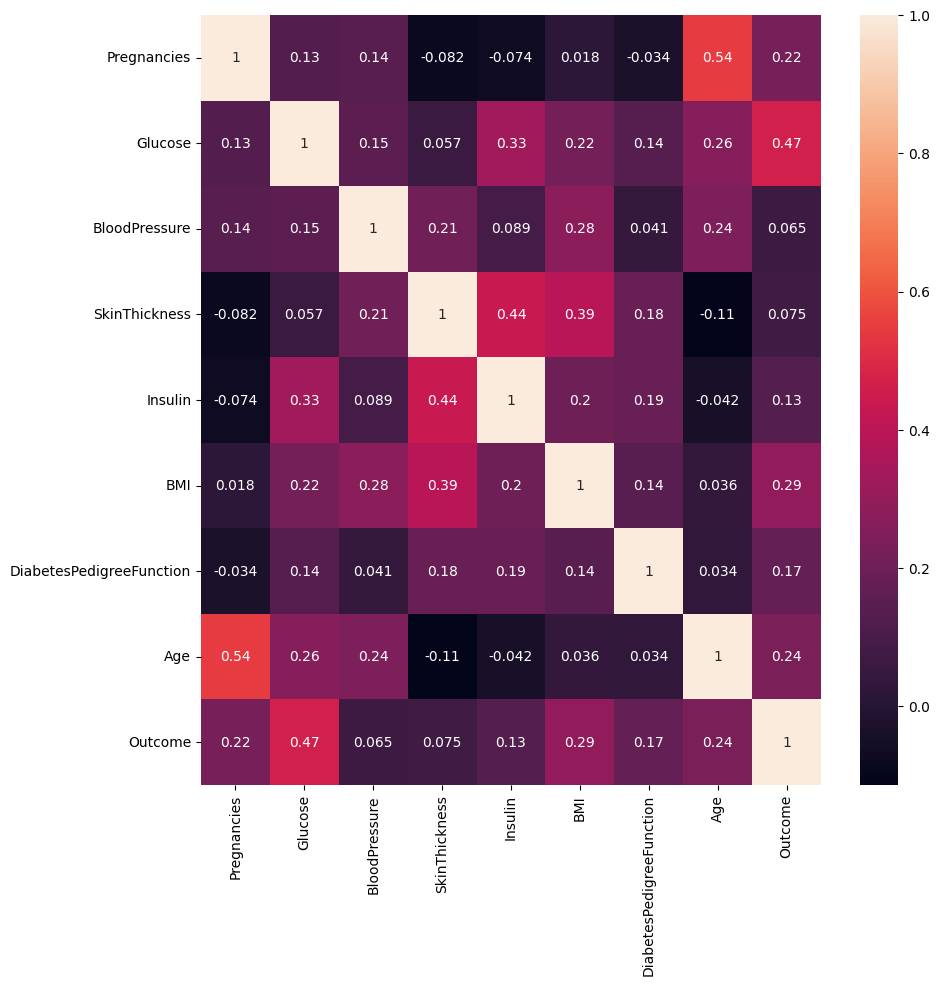

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show

## Descriptive Statistics

In [98]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Imputation

<ipython-input-99-e58df0eee4ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

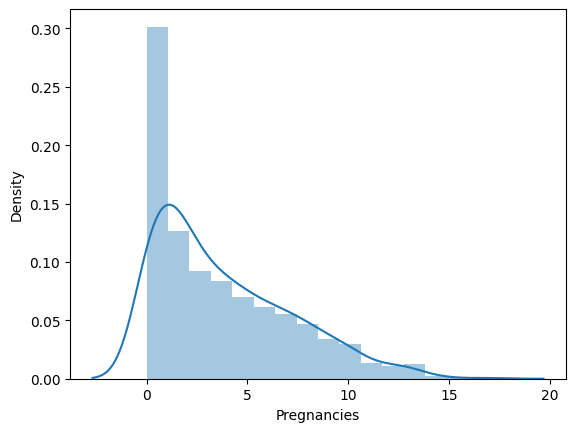

In [99]:
sns.distplot(df['Pregnancies'])

In [100]:
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())

In [101]:
df[df['Pregnancies'] == 0]['Pregnancies'].count()

np.int64(0)

<ipython-input-102-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

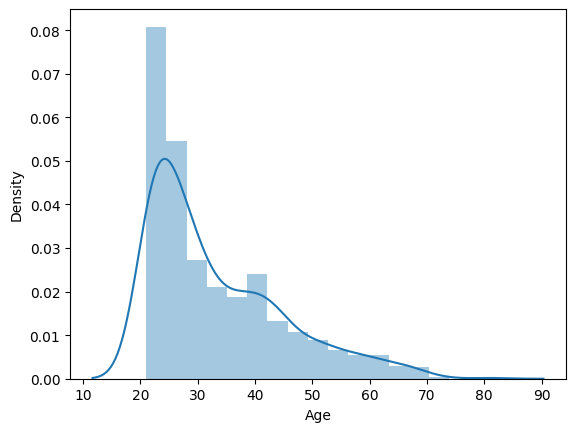

In [102]:
sns.distplot(df['Age'])

In [103]:
df['Age'] = df['Age'].replace(0, df['Age'].median())

<ipython-input-104-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

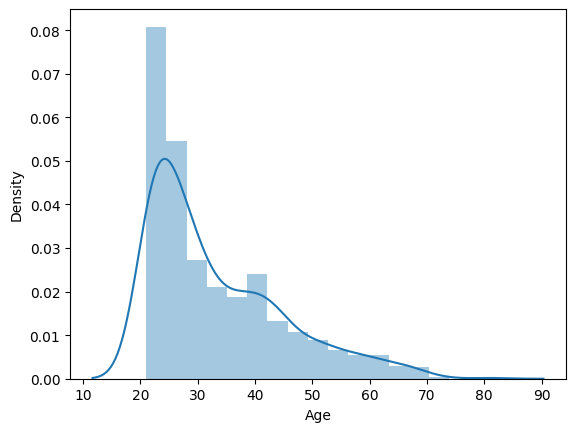

In [104]:
sns.distplot(df['Age'])

<ipython-input-105-edfa99916838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

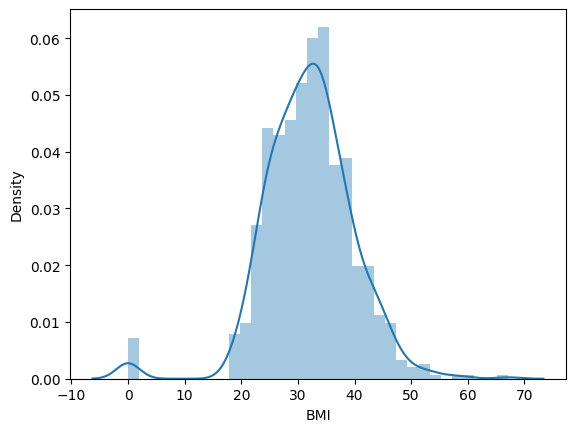

In [105]:
sns.distplot(df['BMI'])

<ipython-input-106-749d972da35b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

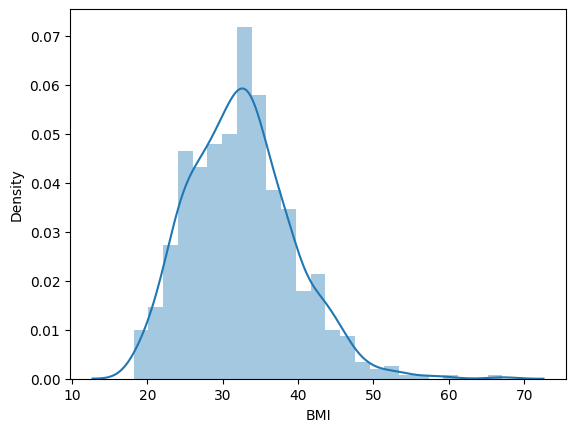

In [106]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
sns.distplot(df['BMI'])

<ipython-input-107-6c56b1065eb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

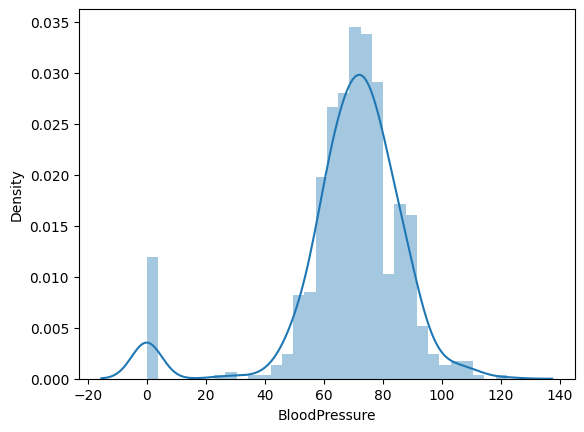

In [107]:
sns.distplot(df['BloodPressure'])

<ipython-input-108-205c44d53e87>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

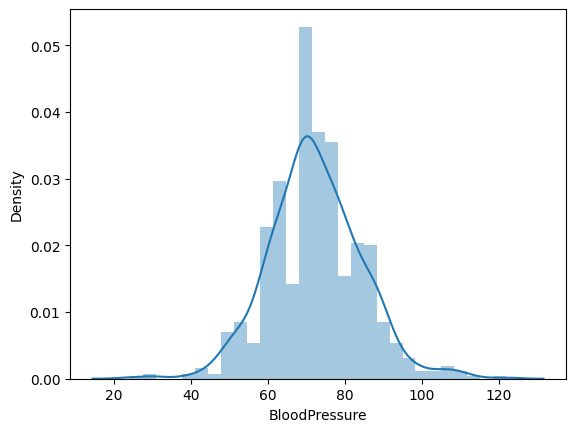

In [108]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
sns.distplot(df['BloodPressure'])

<ipython-input-109-2290e550553f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

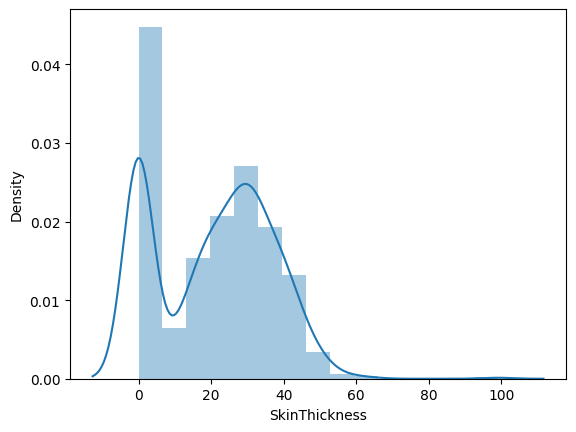

In [109]:
sns.distplot(df['SkinThickness'])

In [110]:
df[df['SkinThickness'] == 0]['SkinThickness'].count()

np.int64(227)

<ipython-input-111-453d5bc98d36>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

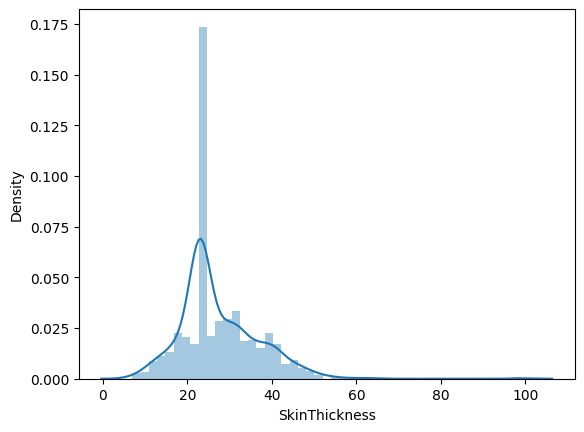

In [111]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
sns.distplot(df['SkinThickness'])

<ipython-input-112-bf1bc1245cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

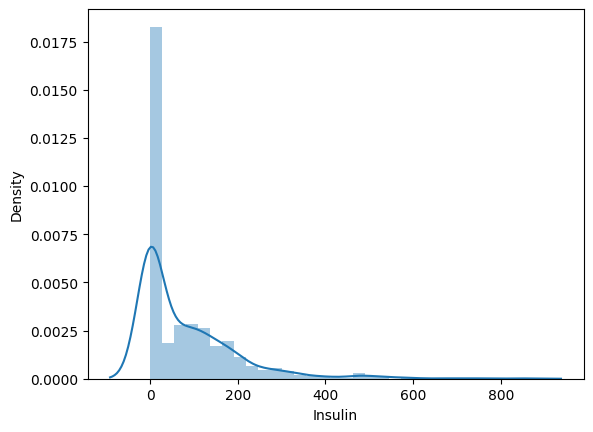

In [112]:
sns.distplot(df['Insulin'])

<ipython-input-113-fd7d2eef61ee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

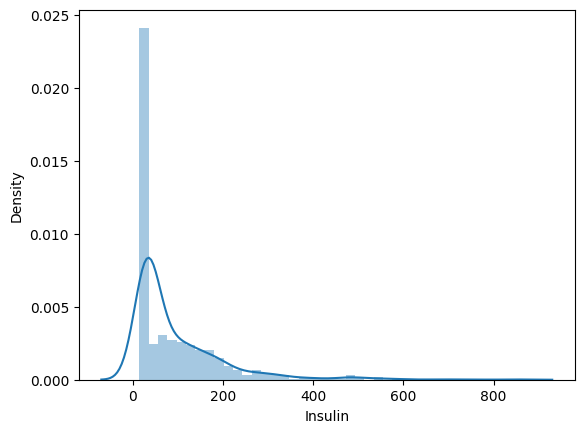

In [113]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
sns.distplot(df['Insulin'])

In [114]:
df[df['Insulin'] == 0]['Insulin'].count()

np.int64(0)

<ipython-input-115-14cc936a1d01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiabetesPedigreeFunction'])


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

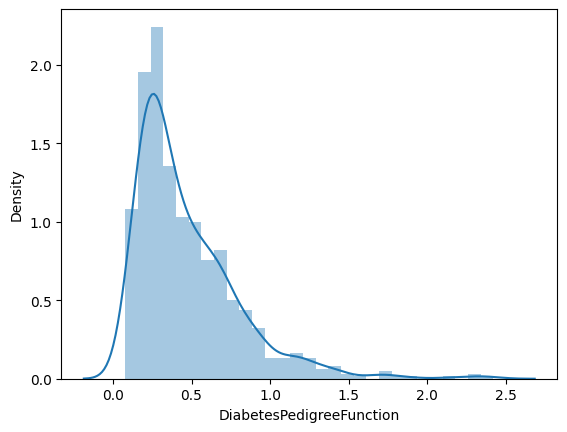

In [115]:
sns.distplot(df['DiabetesPedigreeFunction'])

In [116]:
df[df['DiabetesPedigreeFunction'] == 0]['DiabetesPedigreeFunction'].count()

np.int64(0)

<ipython-input-117-9a66c66cc1f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

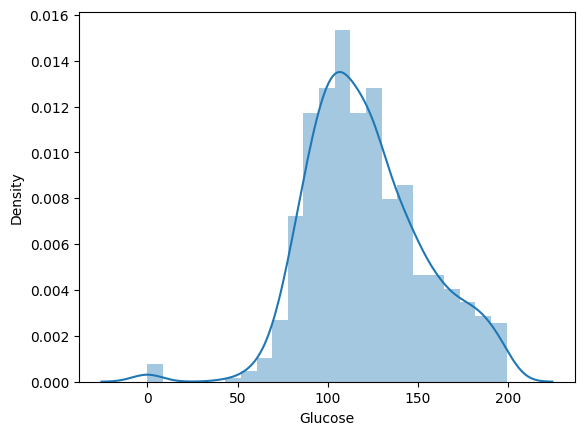

In [117]:
sns.distplot(df['Glucose'])

<ipython-input-118-1ce7d14d75af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

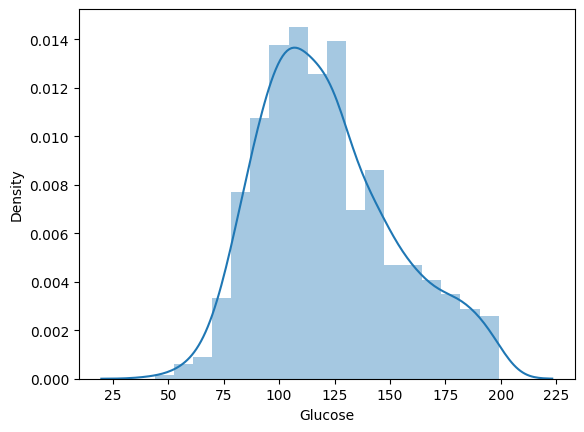

In [118]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
sns.distplot(df['Glucose'])

In [119]:
df[df == 0].count()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


### Outlier detection

In [120]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

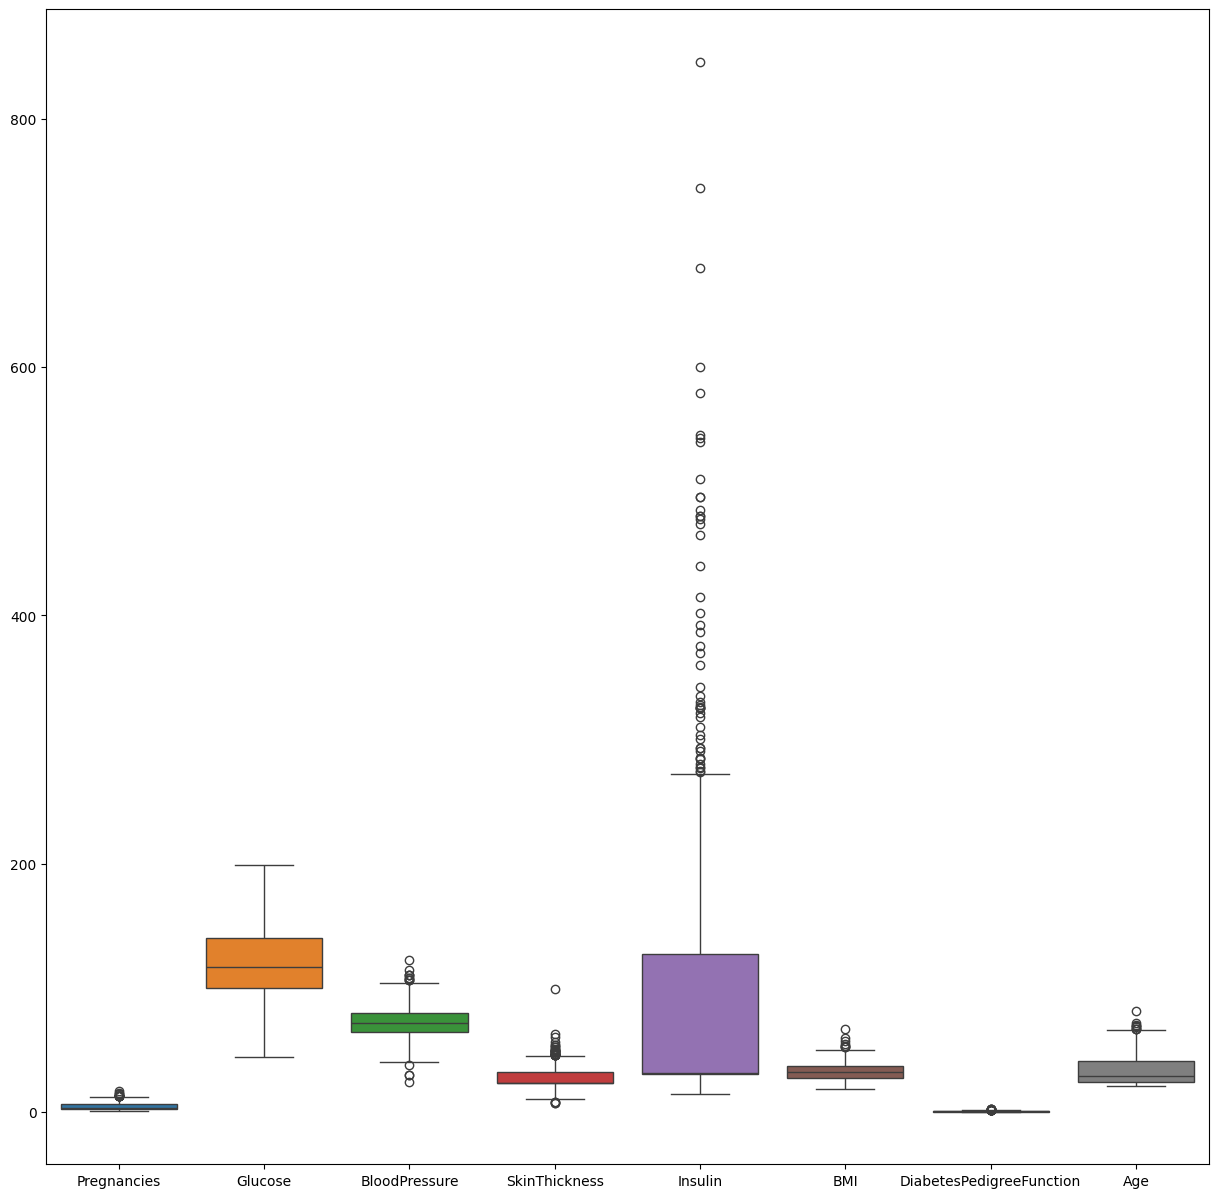

In [121]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X, ax=ax)
plt.show()

In [122]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

Pregnancies                  2.00000
Glucose                     99.75000
BloodPressure               64.00000
SkinThickness               23.00000
Insulin                     30.50000
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Name: 0.25, dtype: float64 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Name: 0.75, dtype: float64 Pregnancies                  4.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
dtype: float64


In [123]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
print(min, max)

X.shape

Pregnancies                  -4.000
Glucose                      39.000
BloodPressure                40.000
SkinThickness                 9.500
Insulin                    -114.625
BMI                          13.850
DiabetesPedigreeFunction     -0.330
Age                          -1.500
dtype: float64 Pregnancies                  12.000
Glucose                     201.000
BloodPressure               104.000
SkinThickness                45.500
Insulin                     272.375
BMI                          50.250
DiabetesPedigreeFunction      1.200
Age                          66.500
dtype: float64


(768, 8)

In [124]:
for i in df:
  if i != 'Outcome':
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR

    mask = (X[i] >= min) & (X[i] <= max)

In [127]:
X_without_outlier = X[mask]
Y_without_outlier = Y[mask]

X_without_outlier.shape

(759, 8)

In [128]:
Y_without_outlier.shape

(759,)

### Standardization

In [129]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
X_scalled = scaller.fit_transform(X_without_outlier)

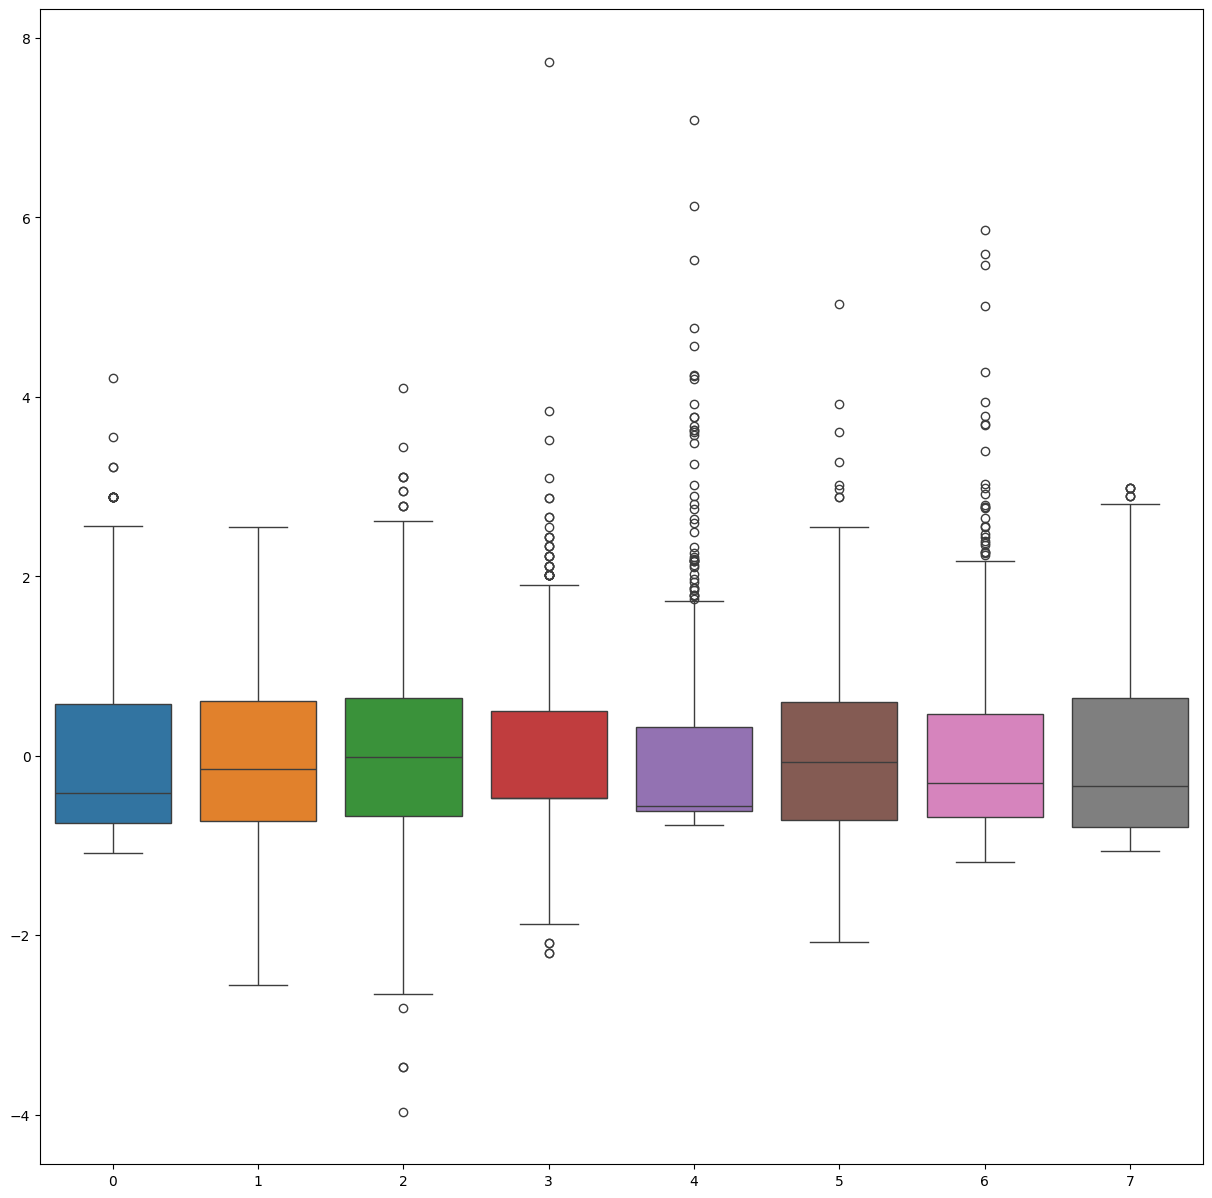

In [130]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scalled, ax=ax)
plt.show()

In [131]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [132]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [133]:
X_scalled_df = pd.DataFrame(X_scalled, columns=cols)
X_scalled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


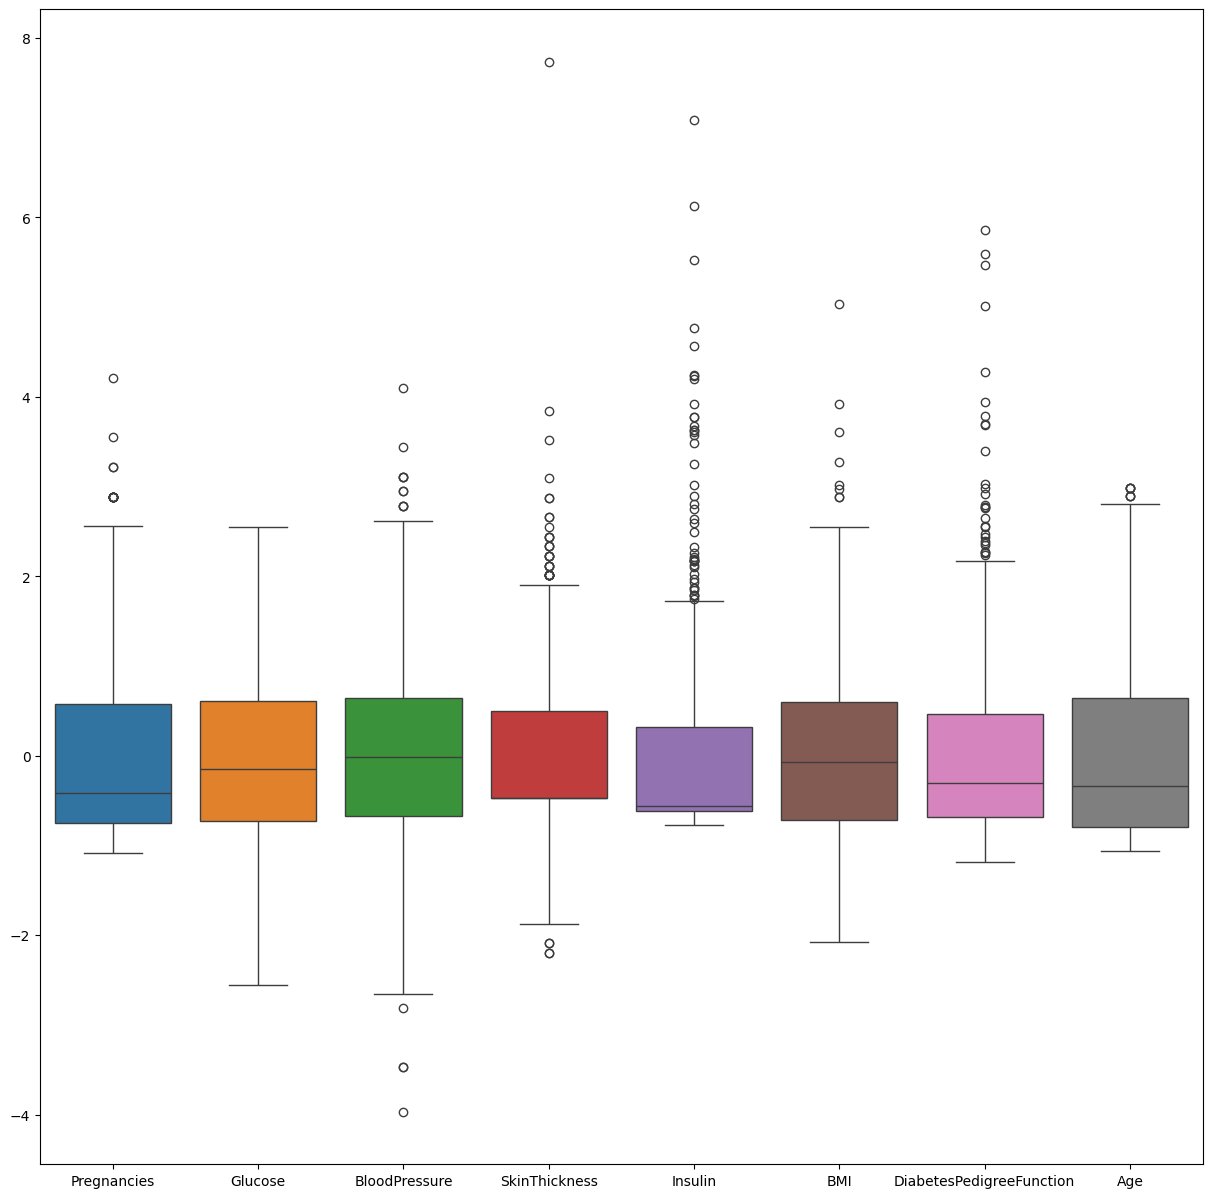

In [134]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scalled_df, ax=ax)
plt.show()

## Outlier Handling - technique 2

In [135]:
X_scalled_df.reset_index(drop=True, inplace=True)
Y_without_outlier.reset_index(drop=True, inplace=True)

In [136]:
q = X_scalled_df['Insulin'].quantile(.95)
mask = X_scalled_df['Insulin'] < q
newData = X_scalled_df[mask]
Y_without_outlier = Y_without_outlier[mask]


print(newData.shape)

(721, 8)


In [137]:
print(Y_without_outlier.shape)

(721,)


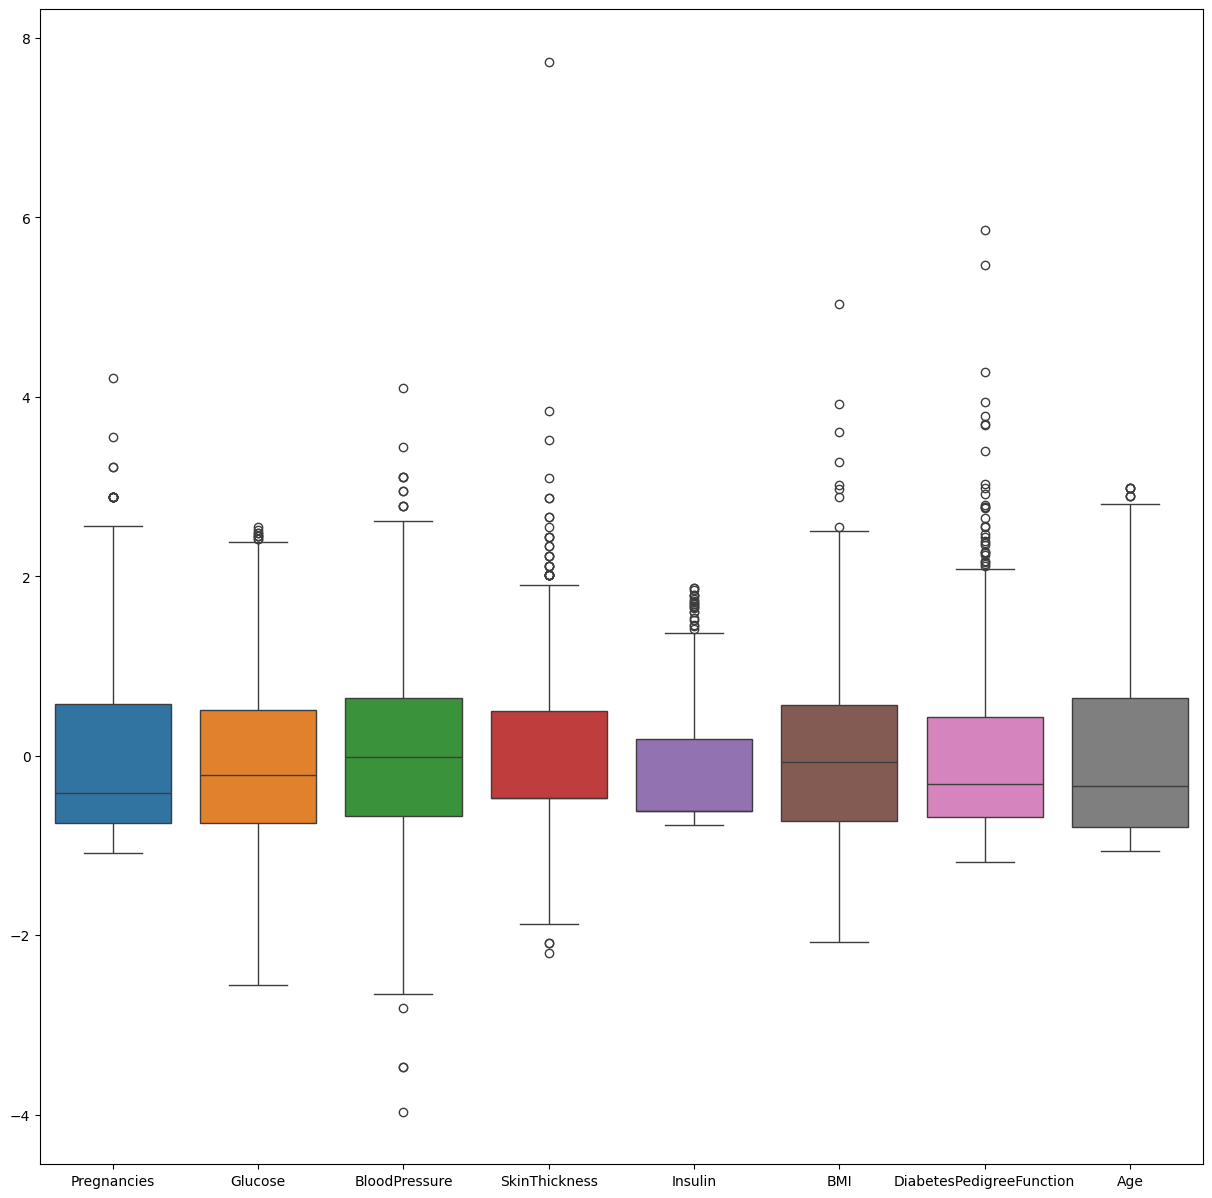

In [138]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=newData, ax=ax)
plt.show()

## Model Training

In [139]:
from sklearn.model_selection import train_test_split

### Splttting of data in training and testing!

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(newData, Y_without_outlier, test_size=0.33, random_state=42)

In [142]:
X_train.shape

(483, 8)

In [143]:
X_test.shape

(238, 8)

Data Imbalancing



*   Oversampling: Minority class and increase that no to the majority class
*   Undersampling: Majority class and decrease that no to the minority class
*   SMOTE: Synthetic data and increase the no of samples to the majority class





In [145]:
Y_train.value_counts()

,count
Outcome,
0,318
1,165


SMOTE technique

In [148]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print(pd.Series(Y_train_smote).value_counts())


Outcome
0    318
1    318
Name: count, dtype: int64


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [151]:
model = LogisticRegression()

model.fit(X_train_smote, Y_train_smote)

LogisticRegression()

### Model Predictions

In [152]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


Model Evaluation

In [154]:
accuracy_score(Y_test, y_pred)

0.7478991596638656

In [156]:
target_names = ['No Diabetes', 'Diabetes']
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.85      0.76      0.80       159
    Diabetes       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



### Saving the Model

In [157]:
import pickle

In [159]:
pickle.dump(model, open("diabetic_predication_model.pkl", "wb"))